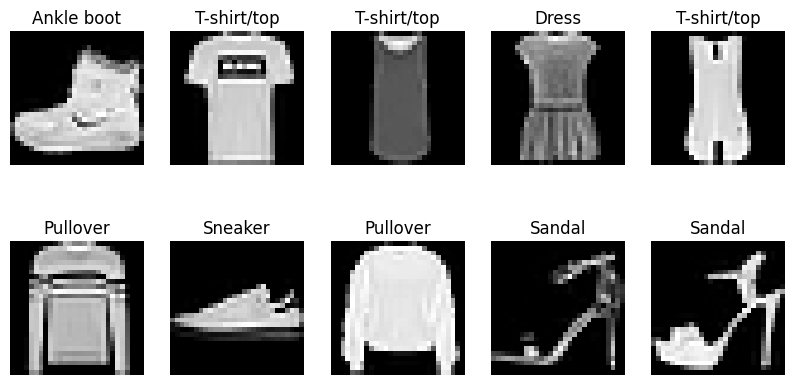

In [2]:
# Fashion MNIST
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Загрузка данных Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Выводим несколько изображений из датасета
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.show()


In [11]:
#1. Классификатор CatBoost.

!pip install catboost
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

#Преобразование данных
# Каждое изображение 28x28 в вектор 784 пикселей
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

#Нормализация данных
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Создание и обучение классификатора CatBoost
clf = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Вывод метрик классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1000
           1       0.98      0.92      0.95      1000
           2       0.72      0.70      0.71      1000
           3       0.75      0.87      0.81      1000
           4       0.69      0.78      0.73      1000
           5       0.97      0.86      0.91      1000
           6       0.61      0.48      0.54      1000
           7       0.86      0.89      0.87      1000
           8       0.93      0.94      0.94      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.81     10000
weighted avg       0.82      0.82      0.81     10000



In [5]:
#2. AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Создание и обучение классификатора AdaBoost
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_classifier = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_classifier.fit(X_train, y_train)

# Прогнозирование классов на тестовом наборе данных
y_pred = ada_classifier.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.02      0.04      1000
           1       0.59      0.90      0.71      1000
           2       0.28      0.03      0.06      1000
           3       0.23      0.35      0.28      1000
           4       0.24      0.01      0.02      1000
           5       0.30      0.93      0.46      1000
           6       0.23      0.66      0.34      1000
           7       0.00      0.00      0.00      1000
           8       0.88      0.51      0.64      1000
           9       0.31      0.02      0.04      1000

    accuracy                           0.34     10000
   macro avg       0.35      0.34      0.26     10000
weighted avg       0.35      0.34      0.26     10000



In [6]:
#3. QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Создание и обучение классификатора QDA
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Вывод метрик классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Accuracy: 0.27
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.75      0.47      1000
           1       0.00      0.00      0.00      1000
           2       0.31      0.87      0.45      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.22      0.23      0.22      1000
           7       0.00      0.00      0.00      1000
           8       0.22      0.89      0.36      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.27     10000
   macro avg       0.11      0.27      0.15     10000
weighted avg       0.11      0.27      0.15     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
#4. KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Создание и обучение модели K Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Задаем количество соседей (K=5)
knn.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = knn.predict(X_test)

# Вывод метрик
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8554

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.73      0.82      0.77      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.77      0.78      1000
           5       0.99      0.82      0.90      1000
           6       0.66      0.57      0.61      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.95      0.96      1000
           9       0.90      0.97      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.85     10000
weighted avg       0.86      0.86      0.85     10000



In [8]:
# 5. lightgbm

import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

# Создание и обучение классификатора LightGBM
clf = lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Вывод метрик классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.387285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170881
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.82      0.81      1000
           3       0.88      0.90      0.89      1000
           4       0.80      0.82      0.81      1000
           5       0.99      0.97      0.98      1000
           6       0.71      0.64      0.68      1000
           7       0.94      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [9]:
# 6. ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score

# Создание и обучение классификатора Extra Trees
clf = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=42)
clf.fit(X_train, y_train)

# Прогнозирование и оценка точности
y_pred = clf.predict(X_test)

# Вывод метрик классификации
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.80      0.79      1000
           3       0.87      0.90      0.89      1000
           4       0.77      0.82      0.80      1000
           5       0.98      0.95      0.97      1000
           6       0.72      0.60      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [12]:
# Сравнение результатов.
# Список моделей для сравнения
models = {
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42, verbose=0),
    "AdaBoost": AdaBoostClassifier( estimator=base_estimator, n_estimators=100, learning_rate=0.1,random_state=42),
    "QDA": QuadraticDiscriminantAnalysis(),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "LightGBM": lgb.LGBMClassifier(num_leaves=31, learning_rate=0.05, n_estimators=100),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=100, max_features='sqrt', random_state=42)
}

# Функция для обучения, предсказания и сбора метрик
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    print(f"Обучаем {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    macro_precision = report['macro avg']['precision']
    macro_recall = report['macro avg']['recall']
    macro_f1 = report['macro avg']['f1-score']
    return {
        "Model": name,
        "Accuracy": acc,
        "Macro Precision": macro_precision,
        "Macro Recall": macro_recall,
        "Macro F1-Score": macro_f1,
        "Classification Report": report
    }

# Оценка всех моделей
results = []
for name, model in models.items():
    try:
        res = evaluate_model(name, model, X_train, y_train, X_test, y_test)
        results.append(res)
    except Exception as e:
        print(f"Ошибка при обучении {name}: {e}")

# Создаем DataFrame с результатами и сортируем по Macro F1-Score
df_results = pd.DataFrame(results).drop(columns=['Classification Report'])
df_results = df_results.sort_values(by='Macro F1-Score', ascending=False).reset_index(drop=True)

print("\nСравнение моделей по метрикам:")
print(df_results)

Обучаем CatBoost...
Обучаем AdaBoost...
Обучаем QDA...


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/p

Обучаем KNeighbors...
Обучаем LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.442117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 170881
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 783
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585
[LightGBM] [Info] Start training from score -2.302585


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Обучаем ExtraTrees...

Сравнение моделей по метрикам:
        Model  Accuracy  Macro Precision  Macro Recall  Macro F1-Score
0    LightGBM    0.8877         0.887051        0.8877        0.887082
1  ExtraTrees    0.8775         0.876581        0.8775        0.876175
2  KNeighbors    0.8554         0.857815        0.8554        0.854644
3    CatBoost    0.8153         0.815109        0.8153        0.813188
4    AdaBoost    0.3429         0.349338        0.3429        0.259131
5         QDA    0.2731         0.109774        0.2731        0.150636
